In [4]:
import os
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

fine_dir = '/media/ldy/7E1CA94545711AE6/OSCC-王/fine/processed data/full_anno/rgb_mask_slide/'
coarse_dir = '/media/ldy/7E1CA94545711AE6/OSCC-王/fine/processed data/full_anno/5x_coarse_mask/slide_mask/rgb_mask'
save_dir = '/media/ldy/7E1CA94545711AE6/OSCC-王/fine/processed data/full_anno/coarse_fine_rgb_slide'

for slide in os.listdir(fine_dir):
    fine_path = os.path.join(fine_dir, slide)
    coarse_path = os.path.join(coarse_dir, slide)
    fine_mask = np.array(Image.open(fine_path))
    coarse_mask = np.array(Image.open(coarse_path))
    mask = (fine_mask + coarse_mask)
    
    mask = Image.fromarray(mask)
    mask.save(os.path.join(save_dir, slide))


# FR统计

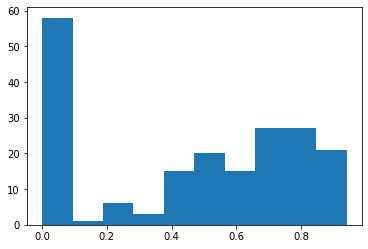

In [10]:
import json

json_dir = '/media/ldy/7E1CA94545711AE6/OSCC-王/fine/processed data/full_anno/global_tumor_fr_3020.json'
with open(json_dir, 'r') as f:
    cnt = json.load(f)
    
frs = cnt.values()
plt.figure()
plt.hist(frs, bins=10)
plt.show()

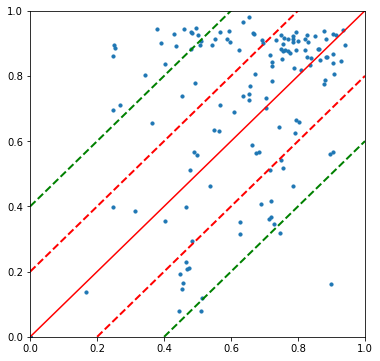

In [31]:
fr_pr_json = '/home/ldy/OralPathoSeg/results-v1/logs/global-frunet-nofr-fr-v3-0.0001-120-[05-17]-test_model_fr.json'
fr_gt_json = '/media/ldy/7E1CA94545711AE6/OSCC-王/fine/processed data/full_anno/global_tumor_fr_3020.json'

with open(fr_pr_json, 'r') as f:
    fr_pr = json.load(f)
with open(fr_gt_json, 'r') as g:
    fr_gt = json.load(g)

pr_list = []
gt_list = []
for k, v in fr_gt.items():
    gt_list.append(v)
    pr_list.append(fr_pr[k.split('.')[0]])

plt.figure(figsize=(6,6))
plt.plot([0,1], [0,1], c='r')
plt.plot([0,0.8], [0.2, 1], c='r', linewidth=2.0, linestyle='--')
plt.plot([0.2,1], [0, 0.8], c='r', linewidth=2.0, linestyle='--')
plt.plot([0,0.6], [0.4, 1], c='g', linewidth=2.0, linestyle='--')
plt.plot([0.4,1], [0, 0.6], c='g', linewidth=2.0, linestyle='--')
plt.scatter(gt_list, pr_list, s=10)
plt.xlim((0, 1))
plt.ylim((0,1))
plt.show()

In [29]:
len(frs)

193

In [36]:
import math

std = 0
dev = 0
num_2 = 0
num_4 = 0
for i, j in zip(gt_list, pr_list):
    dev += abs(i-j)
    std += (i-j)**2
    
    if abs(i-j) <= 0.2:
        num_2 += 1
    elif abs(i-j) <= 0.4:
        num_4 += 1

dev /= len(gt_list)
std /= len(gt_list)
std = math.sqrt(std)
print(dev, std)
print(num_2, num_4)

0.14630582085345062 0.2222584558788249
134 39


In [37]:
143/193, 39 / 193

(0.7409326424870466, 0.20207253886010362)

# unarys热力图

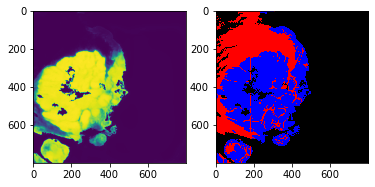

In [49]:
import seaborn as sns
import numpy as np
import cv2
import matplotlib.pyplot as plt

unary_path = '/home/ldy/图片/fine_unarys/2018-04214/2018-04214_1_2_.png'
label_path = '/media/ldy/7E1CA94545711AE6/OSCC-王/fine/processed data/full_anno/5x_tile/5x_gl_3020/rgb_mask/2018-04214/2018-04214_1_2_.png'

unary = cv2.cvtColor(cv2.imread(unary_path), cv2.COLOR_BGR2GRAY)
label = cv2.cvtColor(cv2.imread(label_path), cv2.COLOR_BGR2RGB)
plt.figure()
plt.subplot(121)
plt.imshow(unary)
plt.subplot(122)
plt.imshow(label)
plt.show()

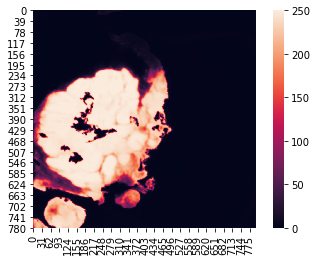

In [50]:
sns.heatmap(data=unary,square=True, vmin=0, vmax=250)

In [42]:
unary

array([[[39, 39, 39],
        [33, 33, 33],
        [22, 22, 22],
        ...,
        [ 9,  9,  9],
        [15, 15, 15],
        [18, 18, 18]],

       [[33, 33, 33],
        [28, 28, 28],
        [18, 18, 18],
        ...,
        [ 8,  8,  8],
        [13, 13, 13],
        [15, 15, 15]],

       [[19, 19, 19],
        [16, 16, 16],
        [10, 10, 10],
        ...,
        [ 4,  4,  4],
        [ 7,  7,  7],
        [ 9,  9,  9]],

       ...,

       [[42, 42, 42],
        [37, 37, 37],
        [27, 27, 27],
        ...,
        [ 3,  3,  3],
        [ 5,  5,  5],
        [ 7,  7,  7]],

       [[51, 51, 51],
        [46, 46, 46],
        [34, 34, 34],
        ...,
        [ 6,  6,  6],
        [ 9,  9,  9],
        [11, 11, 11]],

       [[56, 56, 56],
        [50, 50, 50],
        [38, 38, 38],
        ...,
        [ 7,  7,  7],
        [11, 11, 11],
        [14, 14, 14]]], dtype=uint8)